# 直交関数展開：ベクトルと関数の交差点

## まとめ

:::{tip}

ベクトル空間上の直交基底$\{ \boldsymbol{e}_i \}$の線形結合$c_0 \boldsymbol{e}_0 + c_1 \boldsymbol{e}_e + \cdots + c_n \boldsymbol{e}_n$であらゆるベクトルを表せるのと同様に、関数においても **完備な直交関数系による近似によって任意の関数を表現できる**

その近似は直交関数系$\{\phi_i(x)\}$の線形結合$c_0 \phi_0(x)+c_1 \phi_1(x)+\cdots+c_n \phi_n(x)$なので、級数（$\sum_{i=1}^{\infty} c_i \phi_i(x)$ など）で表現できる（→フーリエ級数）

:::

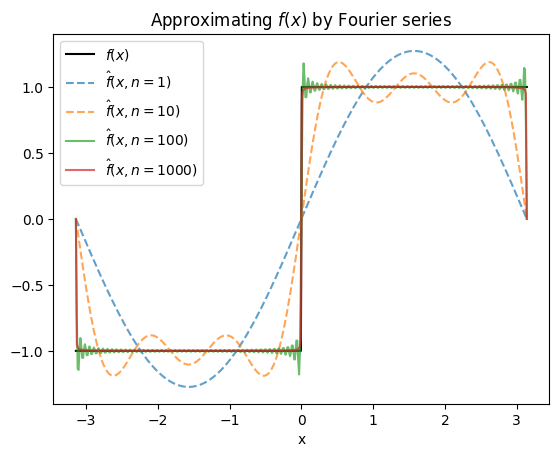

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def f(x: np.array) -> np.array:
    y = np.zeros_like(x)
    y[(0 <= x) & (x <= np.pi)] = 1
    y[(-np.pi <= x) & (x < 0)] = -1
    return y

# a_0, a_k が 0なので、 b_k （sinの係数）のみが残る
def b(k):
    return (2 * (1 - (-1)**k)) / (k * np.pi)

def f_hat(x: np.array, n: int) -> np.array:
    approx = np.zeros_like(x)
    for k in range(1, n+1):
        approx += b(k) * np.sin(k * x)
    return approx


fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 500)
ax.plot(x, f(x), label="$f(x)$", color="black")
ax.plot(x, f_hat(x, n=1), label=r"$\hat{f}(x, n=1)$", linestyle="--", alpha=0.7)
ax.plot(x, f_hat(x, n=5), label=r"$\hat{f}(x, n=10)$", linestyle="--", alpha=0.7)
ax.plot(x, f_hat(x, n=100), label=r"$\hat{f}(x, n=100)$", linestyle="-", alpha=0.7)
ax.plot(x, f_hat(x, n=1000), label=r"$\hat{f}(x, n=1000)$", linestyle="-", alpha=0.7)
ax.set(xlabel="x", title=r"Approximating $f(x)$ by Fourier series")
ax.legend()
fig.show()

## 直交関数

区間 $[a, b]$ 上の関数 $f(x), g(x)$ が

$$
\int_a^b f(x) g(x) \mathrm{d} x=0
$$

のとき **直交する** という。

関数 $\phi_0(x), \phi_1(x), \ldots, \phi_n(x)$ が互いに直交するとき、すなわち

$$
\int_a^b \phi_i(x) \phi_j(x) \mathrm{d} x=0, \quad i \neq j
$$

のとき、これらは区間$[a,b]$上の **直交関数系** であるという。とくに$\phi_i(x)$が$x$の多項式なら、これを **直交多項式** という。

:::{card} 直交多項式の例：ルジャンドルの多項式

次の関数 $P_n(x), n=0,1,2, \ldots$, は $n$ 次の **ルジャンドルの多項式** と呼ばれる。

$$
\begin{aligned}
P_0(x) &= 1 \\
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}\left(3 x^2-1\right) \\
P_3(x) &= \frac{1}{2}\left(5 x^3-3 x\right) \\
P_4(x) &= \frac{1}{8}\left(35 x^4-30 x^2+3\right) \\
P_5(x) &= \frac{1}{8}\left(63 x^5-70 x^3+15 x\right) \\
P_6(x) &= \frac{1}{16}\left(231 x^6-315 x^4+105 x^2-5\right)\\
& \vdots
\end{aligned}
$$

これらは区間 $[-1,1]$ 上の直交関数系であり, 次の直交関係が成立する.

$$
\int_{-1}^1 P_n(x) P_m(x) \mathrm{d} x= \begin{cases}\frac{2}{2 n+1} & n=m \text { のとき } \\ 0 & n \neq m \text { のとき }\end{cases}
$$

$P_n(x)$ の一般式が次式で表せることが知られている（ロドリゲスの公式）.

$$
P_n(x)=\frac{1}{2^n n!} \frac{\mathrm{d}^n\left(x^2-1\right)^n}{\mathrm{~d} x^n}
$$


:::

:::{card} 直交関数の例

$$
\frac{1}{2}, \cos k x, \sin k x,\quad k=1,2,3, \ldots
$$

は区間 $[-\pi, \pi]$ 上の直交関数である。

（証明） $\cos k x, \sin k x, k=1,2,3, \ldots$ は周期 $2 \pi$ の周期関数であるから、 1 周期 に渡る積分 $\int_{-\pi}^\pi \cos k x \mathrm{~d} x, \int_{-\pi}^\pi \sin k x \mathrm{~d} x$ は 0 である。このことから $\frac{1}{2}$ と $\cos k x$, $\sin k x$ に対して次のようになる。

$$
\int_{-\pi}^\pi \frac{1}{2} \cos k x \mathrm{~d} x=\int_{-\pi}^\pi \frac{1}{2} \sin k x \mathrm{~d} x=0
$$

$\cos k x, \sin l x$ に対しては次のようになる。

$$
\int_{-\pi}^\pi \cos k x \sin l x \mathrm{~d} x=\frac{1}{2} \int_{-\pi}^\pi(\sin (k+l) x-\sin (k-l) x) \mathrm{d} x=0
$$

$k \neq l$ のとき $\cos k x, \cos l x$ に対して次のようになる。

$$
\int_{-\pi}^\pi \cos k x \cos l x \mathrm{~d} x=\frac{1}{2} \int_{-\pi}^\pi(\cos (k+l) x+\cos (k-l) x) \mathrm{d} x=0
$$

$k \neq l$ のとき $\sin k x, \sin l x$ に対して次のようになる。

$$
\int_{-\pi}^\pi \sin k x \sin l x \mathrm{~d} x=-\frac{1}{2} \int_{-\pi}^\pi(\cos (k+l) x-\cos (k-l) x) \mathrm{d} x=0
$$

以上より $\frac{1}{2}, \cos k x, \sin k x, k=1,2,3, \ldots$, が直交関数系であることが示された。


また次の関係も成り立つ。

$$
\begin{gathered}
\int_{-\pi}^\pi\left(\frac{1}{2}\right)^2 \mathrm{~d} x=\frac{\pi}{2} \\
\int_{-\pi}^\pi \cos ^2 k x \mathrm{~d} x=\frac{1}{2} \int_{-\pi}^\pi(1+\cos 2 k x) \mathrm{d} x=\pi \\
\int_{-\pi}^\pi \sin ^2 k x \mathrm{~d} x=\frac{1}{2} \int_{-\pi}^\pi(1-\cos 2 k x) \mathrm{d} x=\pi
\end{gathered}
$$

:::

## 最小二乗近似

区間$[a,b]$上の直交関数系$\{\phi_i(x)\}, i=0,1,\cdots,n$の線形結合で関数$f(x)$を近似する事を考える

$$
f(x) \approx c_0 \phi_0(x)+c_1 \phi_1(x)+\cdots+c_n \phi_n(x)
$$

このような近似は、画像や音声を表す信号を少量の数値のみで高速に伝送したり、メモリの記憶容量を削減するために用いられる。

近似の尺度として最小二乗法

$$
J=\frac{1}{2} \int_a^b\left(f(x)-c_0 \phi_0(x)-c_1 \phi_1(x)-\cdots-c_n \phi_n(x)\right)^2 \mathrm{~d} x
$$

$$
\min_{c_0,\cdots,c_n} J
$$

を用いると、各係数$c_i$は

$$
c_i=\frac{\int_a^b f(x) \phi_i(x) \mathrm{d} x}{\int_a^b \phi_i(x)^2 \mathrm{~d} x}, \quad i=0,1, \ldots, n
$$

となる

:::{dropdown} 証明

$$
\begin{aligned}
\frac{\partial J}{\partial c_i}= & -\int_a^b\left(f(x)-c_0 \phi_0(x)-c_1 \phi_1(x)-\cdots-c_n \phi_n(x)\right) \phi_i(x) \mathrm{d} x \\
= & -\left(\int_a^b f(x) \phi_i(x) \mathrm{d} x-c_0 \int_a^b \phi_0(x) \phi_i(x) \mathrm{d} x\right. \\
& \left.\quad-c_1 \int_a^b \phi_1(x) \phi_i(x) \mathrm{d} x-\cdots-c_n \int_a^b \phi_n(x) \phi_i(x) \mathrm{d} x\right) \\
& =-\left(\int_a^b f(x) \phi_i(x) \mathrm{d} x-c_i \int_a^b \phi_i(x)^2 \mathrm{~d} x\right)
\end{aligned}
$$

これを0とおくと、係数が求まる

:::

### 完備

:::{admonition} 定義（完備）

直交関数系の無限列 $\left\{\phi_i\right\}, i=0,1,2, \cdots$ があり、任意の連続関数 $f(x)$ の $\phi_0(x), \phi_1(x), \phi_2(x), \cdots, \phi_n(x)$ による近似が $n \rightarrow \infty$ のときに $f(x)$ に収束するとき、 直交関数系 $\left\{\phi_i\right\}$ は **完備 (complete)** であるといい、 その収束する級数を関数 $f(x)$ の $\left\{\phi_i\right\}$ による **直交関数展開** という。
:::

## フーリエ級数

$$
\frac{1}{2}, \cos k x, \sin k x,\quad k=1,2,3, \ldots
$$

は区間$[-\pi,\pi]$上で完備であることが知られ、これらを用いる直交関数展開を **フーリエ級数 (Fourier series)** という。


関数$f(x)$の近似

$$
f(x) \approx \frac{a_0}{2}+a_1 \cos x+b_1 \sin x+a_2 \cos 2 x+b_2 \sin 2 x+a_3 \cos 3 x+b_3 \sin 3 x+\cdots
$$

の係数$a_n, b_n$は次のようになる

$$
a_0=\frac{1}{\pi} \int_{-\pi}^\pi f(x) \mathrm{d} x, \quad a_k=\frac{1}{\pi} \int_{-\pi}^\pi f(x) \cos k x \mathrm{~d} x, \quad b_k=\frac{1}{\pi} \int_{-\pi}^\pi f(x) \sin k x \mathrm{~d} x
$$

これらの係数を **フーリエ係数** と呼ぶ。

#### 例（フーリエ級数）

:::{card}

次の関数 $f(x)$ を区間 $[-\pi, \pi]$ 上でフーリエ級数に展開せよ

$$
f(x)=\begin{cases}
1 & 0 \leq x \leq \pi \text { のとき } \\
-1 & -\pi \leq x<0 \text { のとき }
\end{cases}
$$
:::

$$
\begin{aligned}
a_0 & =\frac{1}{\pi}\left(-\int_{-\pi}^0 \mathrm{~d} x+\int_0^\pi \mathrm{d} x\right)=\frac{-\pi+\pi}{\pi}=0
\\
a_k & =\frac{1}{\pi}\left(-\int_{-\pi}^0 \cos k x \mathrm{~d} x+\int_0^\pi \cos k x \mathrm{~d} x\right) \\
& =\frac{1}{\pi}\left(-\left[\frac{\sin k x}{k}\right]_{-\pi}^0+\left[\frac{\sin k x}{k}\right]_0^\pi\right)=0
\\
b_k & =\frac{1}{\pi}\left(-\int_{-\pi}^0 \sin k x \mathrm{~d} x+\int_0^\pi \sin k x \mathrm{~d} x\right)=\frac{1}{\pi}\left(\left[\frac{\cos k x}{k}\right]_{-\pi}^0-\left[\frac{\cos k x}{k}\right]_0^\pi\right) \\
& =\frac{1}{\pi}\left(\frac{1-\cos (-\pi) k}{k}-\frac{\cos \pi k-1}{k}\right)=\frac{2\left(1-(-1)^k\right)}{k \pi}
\end{aligned}
$$

よって、次のようになる

$$
f(x)=\frac{4}{\pi} \sin x+\frac{4}{3 \pi} \sin 3 x+\frac{4}{5 \pi} \sin 5 x+\frac{4}{7 \pi} \sin 7 x+\cdots
$$

この近似を $\hat{f}(x, n) = \sum_{k=1}^n b_k \cdot \sin kx$ とおく。pythonで計算すると次の図のようになる

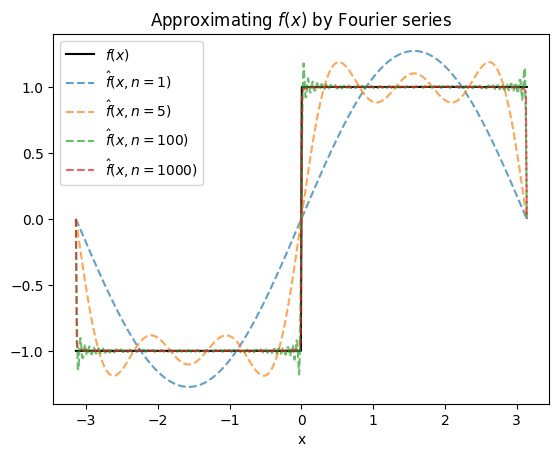

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def f(x: np.array) -> np.array:
    y = np.zeros_like(x)
    y[(0 <= x) & (x <= np.pi)] = 1
    y[(-np.pi <= x) & (x < 0)] = -1
    return y

# a_0, a_k が 0なので、 b_k （sinの係数）のみが残る
def b(k):
    return (2 * (1 - (-1)**k)) / (k * np.pi)

def f_hat(x: np.array, n: int) -> np.array:
    approx = np.zeros_like(x)
    for k in range(1, n+1):
        approx += b(k) * np.sin(k * x)
    return approx


fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 500)
ax.plot(x, f(x), label="$f(x)$", color="black")
ax.plot(x, f_hat(x, n=1), label=r"$\hat{f}(x, n=1)$", linestyle="--", alpha=0.7)
ax.plot(x, f_hat(x, n=5), label=r"$\hat{f}(x, n=5)$", linestyle="--", alpha=0.7)
ax.plot(x, f_hat(x, n=100), label=r"$\hat{f}(x, n=100)$", linestyle="--", alpha=0.7)
ax.plot(x, f_hat(x, n=1000), label=r"$\hat{f}(x, n=1000)$", linestyle="--", alpha=0.7)
ax.set(xlabel="x", title=r"Approximating $f(x)$ by Fourier series")
ax.legend()
fig.show()

## 直交展開

計量空間の元 $e_1, e_2, \ldots, e_n$ が互いに直交するとき、すなわち

$$
\left(\boldsymbol{e}_i, \boldsymbol{e}_j\right)=0, \quad i \neq j
$$


のとき、これらは **直交系** であるという。 特に、すべてがノルム $1\left(\left\|\boldsymbol{e}_i\right\|=1\right.$, $i=1, \ldots, n)$ のとき、これを **正規直交系** という。 式で書くと次のようになる。

$$
\left(\boldsymbol{e}_i, \boldsymbol{e}_j\right)=\delta_{i j}
$$

ただし$\delta_{i j}$はクロネッカーのデルタである


### 線形結合による表現

計量空間$L$の直交系$\{\boldsymbol{e}_i \}, i=1,\dots, n$を用いて、任意の元$u\in L$を線形結合で

$$
\boldsymbol{u} \approx c_1 \boldsymbol{e}_1+c_2 \boldsymbol{e}_2+\cdots+c_n \boldsymbol{e}_n
$$

と近似することを考える。

二乗誤差

$$
J=\frac{1}{2}\left\|\boldsymbol{u}-\left(c_1 \boldsymbol{e}_1+c_2 \boldsymbol{e}_2+\cdots+c_n \boldsymbol{e}_n\right)\right\|^2
$$

を用いて最小二乗法で近似すると、解は

$$
c_i=\frac{\left(\boldsymbol{u}, \boldsymbol{e}_i\right)}{\left\|\boldsymbol{e}_i\right\|^2}
\quad i=1,\dots, n
$$

となる。

:::{dropdown} 証明

$$
\begin{aligned}
J &= \frac{1}{2}
\left\|\boldsymbol{u}-\left(c_1 \boldsymbol{e}_1+c_2 \boldsymbol{e}_2+\cdots+c_n \boldsymbol{e}_n\right)\right\|^2
\\
&= \frac{1}{2}
\left\|\boldsymbol{u}- \sum^n_{j=1} c_j \boldsymbol{e}_j \right\|^2
\\
&= \frac{1}{2}
\left ( \boldsymbol{u}- \sum^n_{j=1} c_j \boldsymbol{e}_j, \boldsymbol{u}- \sum^n_{j=1} c_j \boldsymbol{e}_j  \right)
\end{aligned}
$$

内積の微分は

$$
\frac{d}{d x} \langle \boldsymbol{f}(x), \boldsymbol{g}(x) \rangle
= \left \langle \frac{d \boldsymbol{f}(x)}{d x}, \boldsymbol{g}(x) \right \rangle
+\left \langle \boldsymbol{f}(x), \frac{d \boldsymbol{g}(x)}{d x}\right \rangle
$$

となるため、

$$
\begin{aligned}
\frac{\partial J}{\partial c_i}
&=\frac{1}{2} \frac{\partial}{\partial c_i}\left(\boldsymbol{u}-\sum_{j=1}^n c_j \boldsymbol{e}_j, \boldsymbol{u}-\sum_{k=1}^n c_k \boldsymbol{e}_k\right) \\
&=\frac{1}{2}\left(-\boldsymbol{e}_i, \boldsymbol{u}-\sum_{j=1}^n c_j \boldsymbol{e}_j\right)
+\frac{1}{2}\left(\boldsymbol{u}-\sum_{j=1}^n c_j \boldsymbol{e}_j,-\boldsymbol{e}_i\right) \\
&=\left(\boldsymbol{u}-\sum_{j=1}^n c_j \boldsymbol{e}_j,-\boldsymbol{e}_i\right) \quad (\because 内積の対称性)
\\
&= \left(\boldsymbol{u}, -\boldsymbol{e}_i\right)
- \left(\sum_{j=1}^n c_j \boldsymbol{e}_j, -\boldsymbol{e}_i\right) \quad \because内積の線形性\\
&= \left(\sum_{j=1}^n c_j \boldsymbol{e}_j, \boldsymbol{e}_i\right) -\left(\boldsymbol{u}, \boldsymbol{e}_i\right)\\
&= \sum_{j=1}^n c_j \left(\boldsymbol{e}_j, \boldsymbol{e}_i\right) -\left(\boldsymbol{u}, \boldsymbol{e}_i\right) \quad \because内積の線形性\\
& =\sum_{j=1}^n c_j \delta_{i j}\left\|\boldsymbol{e}_j\right\|^2-\left(\boldsymbol{u}, \boldsymbol{e}_i\right) \\
&=c_i\left\|\boldsymbol{e}_i\right\|^2-\left(\boldsymbol{u}, \boldsymbol{e}_i\right)
\end{aligned}
$$


これを0とおいて解くと求まる

$$
c_i \|\boldsymbol{e}_i\|^2 - (\boldsymbol{u}, \boldsymbol{e}_i) = 0 \\
\iff c_i \|\boldsymbol{e}_i\|^2 = (\boldsymbol{u}, \boldsymbol{e}_i)\\
\iff c_i = \frac{ (\boldsymbol{u}, \boldsymbol{e}_i) }{ \|\boldsymbol{e}_i\|^2 }\\
$$

:::

:::{dropdown} 参考：内積の微分

内積の微分は

$$
\boldsymbol{f}(x) = (f_1(x), \cdots, f_n(x))
\boldsymbol{g}(x) = (g_1(x), \cdots, g_n(x))
$$

とすると

$$
\begin{aligned}
\frac{d}{d x} \langle \boldsymbol{f}(x), \boldsymbol{g}(x) \rangle
&= \frac{d}{d x} \left( \sum_{i=1}^n f_i(x) g_i(x)  \right)\\
&= \sum_{i=1}^n \frac{d}{d x} \left(  f_i(x) g_i(x)  \right)\\
&= \sum_{i=1}^n \left( \frac{d f_i(x)}{d x} g_i(x) + f_i(x) \frac{d g_i(x)}{d x} \right) \quad (積の微分公式) \\
&= \sum_{i=1}^n \frac{d f_i(x)}{d x} g_i(x)
+ \sum_{i=1}^n f_i(x) \frac{d g_i(x)}{d x} \\
&= \left \langle \frac{d \boldsymbol{f}(x)}{d x}, \boldsymbol{g}(x) \right \rangle
+\left \langle \boldsymbol{f}(x), \frac{d \boldsymbol{g}(x)}{d x}\right \rangle
\end{aligned}
$$

となる

[大学物理のフットノート|物理数学|ベクトルの微分公式(基本編)](https://diracphysics.com/portfolio/physicalmath/S3/pdiffvec.html)
:::

計量空間$L$の直交系$\{\boldsymbol{e}_i \}, i=1,\dots, n$を用いて、任意の元$u\in L$を線形結合で等号で

$$
\boldsymbol{u} = c_1 \boldsymbol{e}_1+c_2 \boldsymbol{e}_2+\cdots+c_n \boldsymbol{e}_n
$$

と表される場合に、係数$c_i$は最小二乗法による近似と同じ解

$$
c_i = \frac{ (\boldsymbol{u}, \boldsymbol{e}_i) }{ \|\boldsymbol{e}_i\|^2 }
$$

になる


:::{dropdown} 証明

$$
\boldsymbol{u} = c_1 \boldsymbol{e}_1 + \cdots + c_n \boldsymbol{e}_n
$$

の両辺と$\boldsymbol{e}_i$の内積をとると、

$$
\begin{aligned}
(\boldsymbol{u}, \boldsymbol{e}_i)
&= c_1 (\boldsymbol{e}_1, \boldsymbol{e}_i) + \cdots + c_n (\boldsymbol{e}_n, \boldsymbol{e}_i)\\
&= c_i (\boldsymbol{e}_i, \boldsymbol{e}_i)\\
&= c_i \| \boldsymbol{e}_i \|^2\\
\end{aligned}
$$

よって

$$
c_i = \frac{ (\boldsymbol{u}, \boldsymbol{e}_i) }{ \|\boldsymbol{e}_i\|^2 }
$$

:::

## 直交射影

元$\boldsymbol{u}$を直交系$\boldsymbol{e}_1, \boldsymbol{e}_2, \ldots, \boldsymbol{e}_n$の線形結合の集合$\mathcal{V}_n$（$\{\boldsymbol{e}_i\}$の張る部分空間）で近似することを考える。

$$
\boldsymbol{u} \approx c_1 \boldsymbol{e}_1+c_2 \boldsymbol{e}_2+\cdots+c_n \boldsymbol{e}_n
$$

最小二乗近似したものは

$$
c_i = \frac{ (\boldsymbol{u}, \boldsymbol{e}_i) }{ \|\boldsymbol{e}_i\|^2 }
$$

より

$$
\hat{\boldsymbol{u}} = \sum_{i=1}^n \frac{ (\boldsymbol{u}, \boldsymbol{e}_i) }{ \|\boldsymbol{e}_i\|^2 } \boldsymbol{e}_i
$$

と書くことができる。$\hat{\boldsymbol{u}}$の幾何学的な解釈としては、$\boldsymbol{u}$から$\{\boldsymbol{e}_i\}$の張る部分空間へと下ろした「垂線の足」となる。
このことから、$\hat{\boldsymbol{u}}$は$\{\boldsymbol{e}_i\}$の張る部分空間$\mathcal{V}_n$への **（直交）射影** と呼ぶ。


### 直交基底

直交系$\boldsymbol{e}_1, \boldsymbol{e}_2, \ldots, \boldsymbol{e}_n$（$n=\infty$でもよい）による、計量空間$\mathcal{L}$の元$\boldsymbol{u}$の最小二乗近似$\hat{\boldsymbol{u}}$が$\boldsymbol{u}$に一致するとき（$n=\infty$のときは$n\to \infty$で$\boldsymbol{u}$に収束するとき）、$\{\boldsymbol{e}_i\}$は$\mathcal{L}$の **直交基底** であるという。

このとき$\mathcal{L}$は **$n$次元計量空間** （$n=\infty$なら **無限次元計量空間** ）であるという。

直交基底の線形結合で表すことを **直交展開** という。

:::{card} 直交基底の例：ルジャンドルの多項式

ルジャンドルの多項式$P_n(x)$

$$
P_n(x)=\frac{1}{2^n n!} \frac{\mathrm{d}^n\left(x^2-1\right)^n}{\mathrm{~d} x^n}
$$

は区間$[-1,1]$上の連続関数の直交基底である

$$
\int_{-1}^1 P_n(x) P_m(x) \mathrm{d} x= \begin{cases}\frac{2}{2 n+1} & n=m \text { のとき } \\ 0 & n \neq m \text { のとき }\end{cases}
$$
:::

### パーセバルの式

$\mathcal{L}$を計量空間とする。$\boldsymbol{u}, \boldsymbol{v} \in \mathcal{L}$について、正規直交基底$\{\boldsymbol{e}_i\}, i=1,\dots,n$で

$$
\begin{aligned}
\boldsymbol{u}&=c_1 \boldsymbol{e}_1+c_2 \boldsymbol{e}_2+\cdots+c_n \boldsymbol{e}_n \\
\boldsymbol{v}&=d_1 \boldsymbol{e}_1+d_2 e_2+\cdots+d_n \boldsymbol{e}_n
\end{aligned}
$$

と表したとする。このとき、次の **パーセバル（・プランシュレル）の式** が成り立つ（$n=\infty$でも成り立つ）


$$
(\boldsymbol{u}, \boldsymbol{v})=\sum_{i=1}^n c_i d_i, \quad\|\boldsymbol{u}\|^2=\sum_{i=1}^n c_i^2
$$


:::{dropdown} 証明

$$
\begin{aligned}
(\boldsymbol{u}, \boldsymbol{v})
&= \left( \sum_{i=1}^n c_i \boldsymbol{e}_i, \sum_{j=1}^n d_j \boldsymbol{e}_j \right)\\
&= \sum_{i=1}^n c_i \left( \boldsymbol{e}_i, \sum_{j=1}^n d_j \boldsymbol{e}_j \right) \quad (\because 内積の線形性)\\
&= \sum_{i=1}^n \sum_{j=1}^n c_i d_j \left( \boldsymbol{e}_i, \boldsymbol{e}_j \right) \quad (\because 内積の線形性)\\
&= \sum_{i=1}^n \sum_{j=1}^n c_i d_j \delta_{ij} \quad (\because \boldsymbol{e}は 正規直交基底)\\
&= \sum_{i=1}^n c_i d_i
\end{aligned}
$$

$$
\begin{aligned}
\|\boldsymbol{u}\|^2
&= (\boldsymbol{u}, \boldsymbol{u})\\
&= (\sum_{i=1}^n c_i \boldsymbol{e}_i, \sum_{j=1}^n c_j \boldsymbol{e}_j)\\
&= \sum_{i=1}^n \sum_{j=1}^n c_i c_j (\boldsymbol{e}_i, \boldsymbol{e}_j)\\
&= \sum_{i=1}^n \sum_{j=1}^n c_i c_j \delta_{ij}\\
&= \sum_{i=1}^n c_i^2\\
\end{aligned}
$$

:::

## 参考

金谷健一. (2003). これなら分かる応用数学教室: 最小二乗法からウェーブレットまで.